# Fandango Movie Ratings

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

In [5]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 Exploring Fandango Displayed Scores versus True User Ratings

In [6]:
fandango = pd.read_csv("fandango_scrape.csv")

In [7]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [8]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


Exploring the DataFrame Properties and Head.

In [9]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


Exploring the relationship between popularity of a film and its rating. Creating a scatterplot showing the relationship between rating and votes.

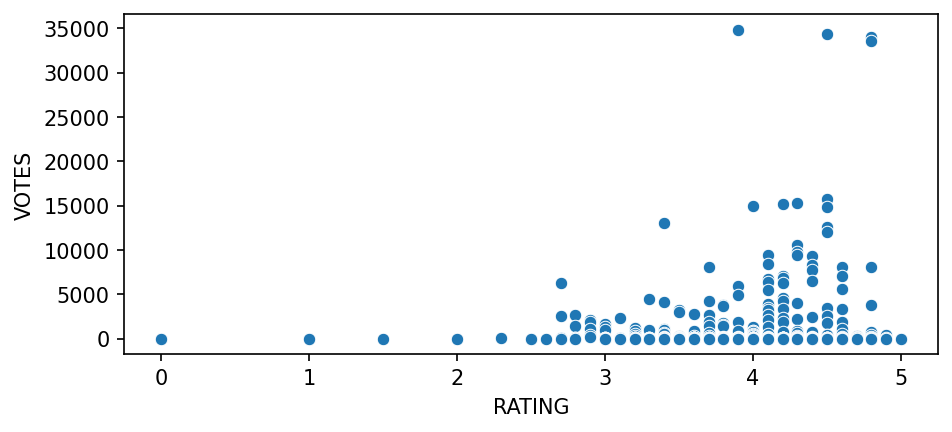

In [10]:
# CODE HERE
plt.figure(figsize=(7,3),dpi=150)
sns.scatterplot(data=fandango,x='RATING',y='VOTES')
plt.show()

Calculating the correlation between the columns:

In [11]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


Creating a new column that is able to strip the year from the title strings and setting this new column as YEAR

In [12]:
#f= 'Fifty Shades of Grey (2015)'
#k =f.split()[-1]
#k=k.replace('(','')
#k.replace(')','')

def year(film):
    f = film.split()[-1]
    f = f.replace('(','')
    f = f.replace(')','')
    return f

In [13]:
fandango['YEAR'] = np.vectorize(year)(fandango['FILM'])

In [14]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


Calculating the number of movies in the Fandango DataFrame per year

In [15]:
fandango.groupby(by=fandango['YEAR']).count()['FILM']

YEAR
1964      1
2012      1
2014     23
2015    478
2016      1
Name: FILM, dtype: int64

Visualizing the count of movies per year with a count plot

<AxesSubplot:xlabel='YEAR', ylabel='count'>

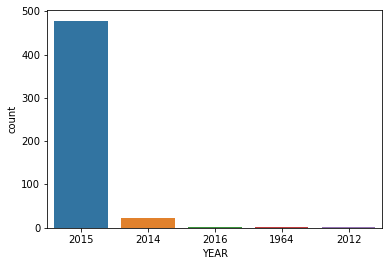

In [16]:
#CODE HERE
sns.countplot(data=fandango,x='YEAR')

Top 10 movies with the highest number of votes

In [17]:
fandango.sort_values(by='VOTES',ascending=False)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
463,La leon (2015),0.0,0.0,0,2015
464,La passion d'Augustine (2015),0.0,0.0,0,2015
465,Le gaucher (2015),0.0,0.0,0,2015
466,Le monde de demain (2015),0.0,0.0,0,2015


Number of movies that have zero votes

In [18]:
len(fandango[fandango['VOTES']== 0])

69

Creating a DataFrame of only reviewed films by removing any films that have zero votes

In [19]:
fan_rev = fandango[fandango['VOTES']>0]
fan_rev

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015



Kernal Density Estimation Plot of True User Ratings Vs Stars Displayed 

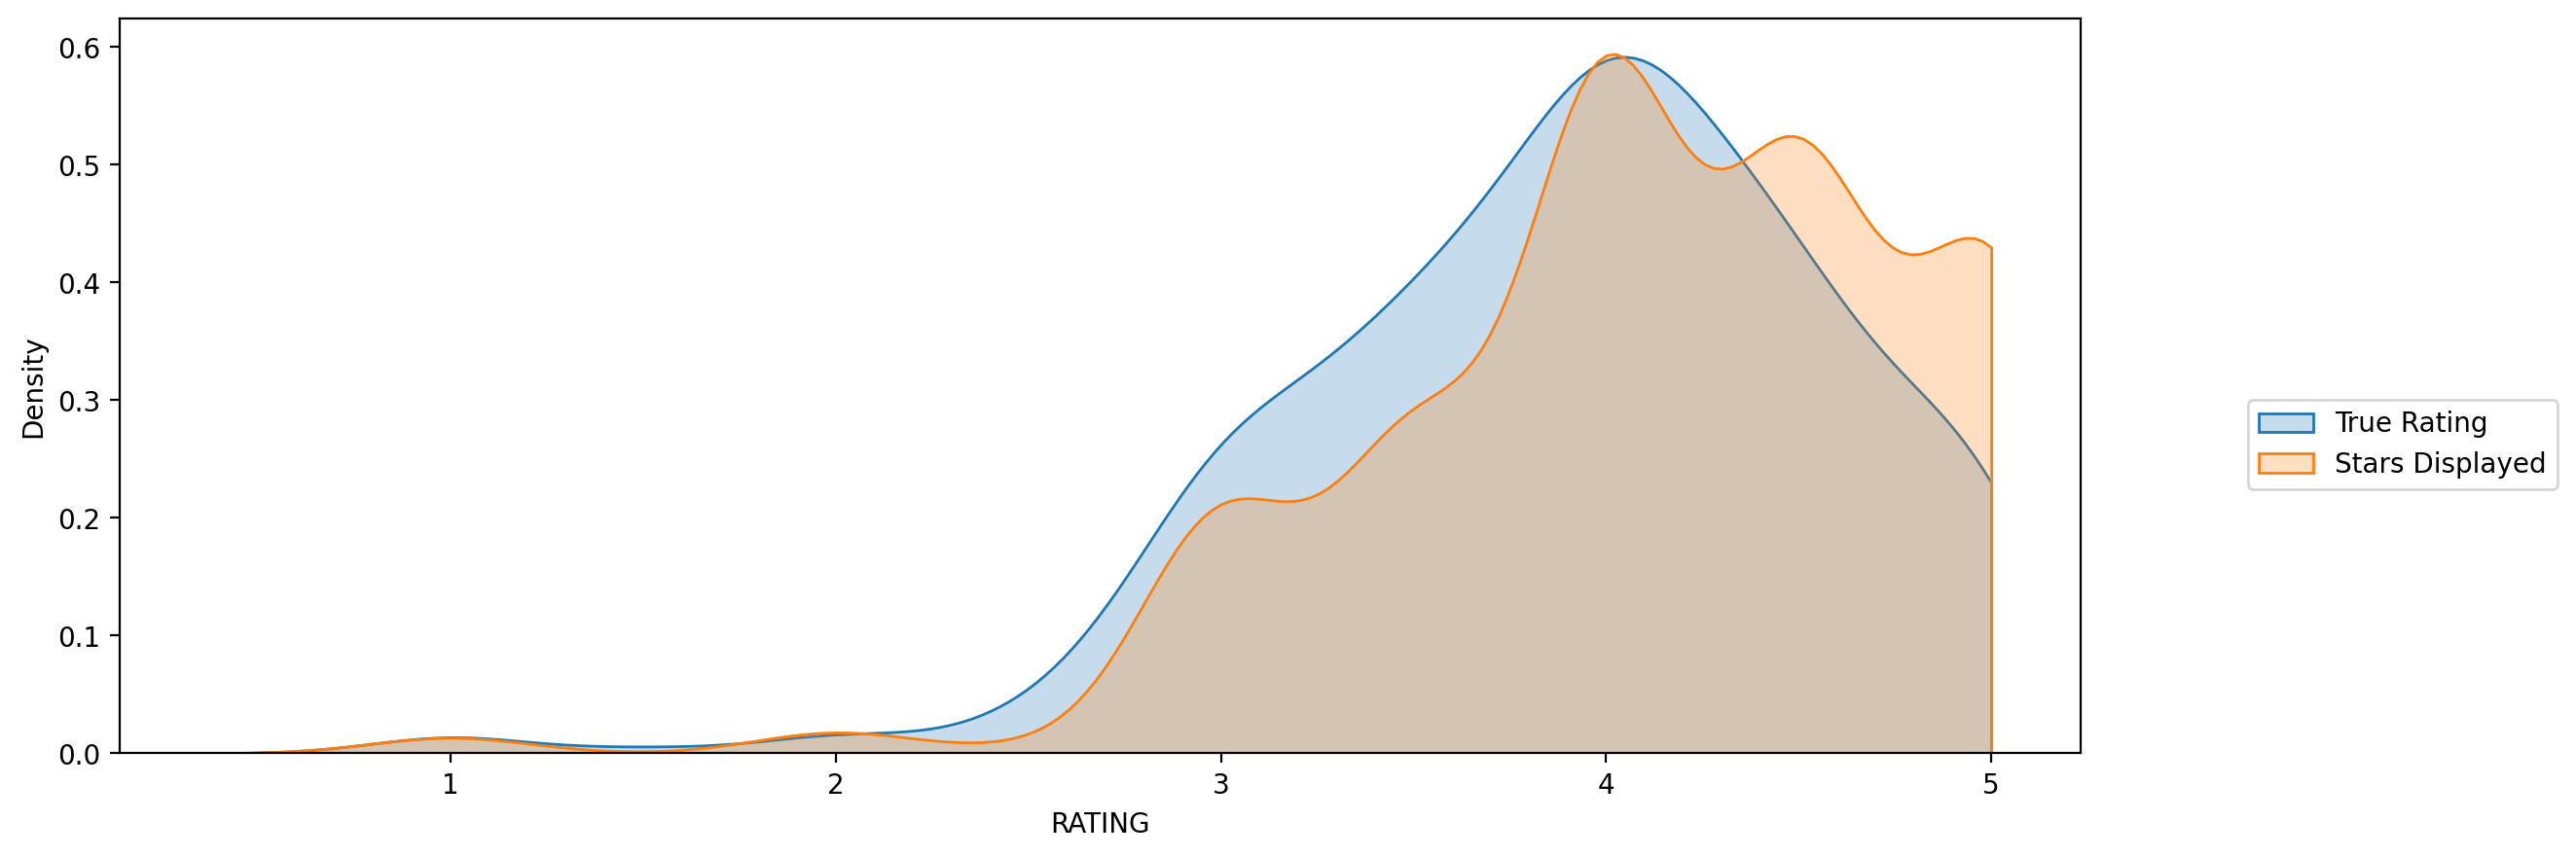

In [20]:
plt.figure(figsize=(13,5),dpi=200)
sns.kdeplot(data=fan_rev['RATING'],fill=True,clip=(0,5),label='True Rating')
sns.kdeplot(data=fan_rev['STARS'],fill=True,clip=(0,5),label='Stars Displayed')
plt.legend(bbox_to_anchor=(1.25,0.5))
plt.show()

Creating a new column with the difference between STARS displayed versus true RATING and rounding these differences to the nearest decimal point

In [21]:
fan_rev['STARS_DIFF'] = round(fan_rev['STARS'] - fan_rev['RATING'],1)

<ipython-input-21-64e576b83c57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_rev['STARS_DIFF'] = round(fan_rev['STARS'] - fan_rev['RATING'],1)


In [22]:
fan_rev

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


Creating a count plot to display the number of times a certain difference occurs

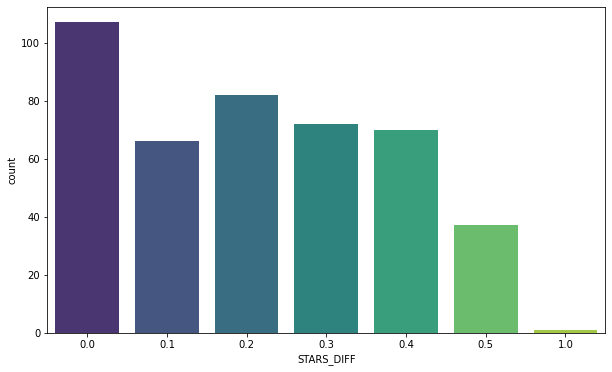

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(data=fan_rev,x='STARS_DIFF',palette='viridis');

We can see from the plot that one movie was displaying over a 1 star difference than its true rating! Finding out which movie had this close to 1 star differential

In [24]:
fan_rev[fan_rev['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


Comparing the scores from Fandango to other movies sites and see how they compare.

In [25]:
all_sites = pd.read_csv("all_sites_scores.csv")

Exploring the DataFrame columns, info, description

In [26]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [27]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [28]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


Exploring Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

Creating a scatterplot exploring the relationship between RT Critic reviews and RT User reviews

(0.0, 100.0)

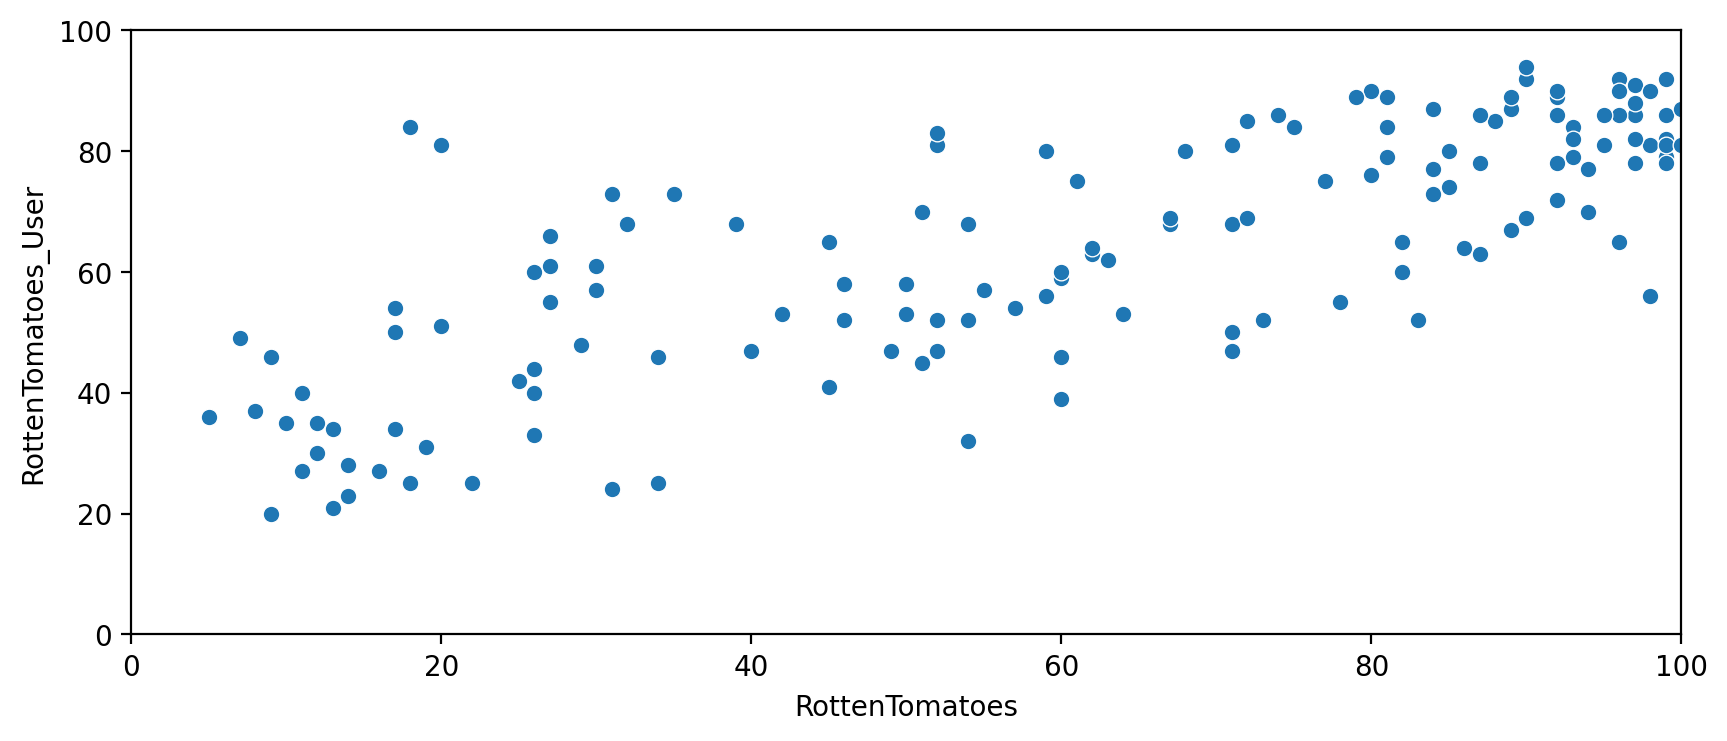

In [29]:
ax = plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100)

Quantifying this difference by comparing the critics ratings and the RT User ratings.Calculating this using RottenTomatoes-RottenTomatoes_User. 

Note: Rotten_Diff here is Critics - User Score. So values closer to 0 means agreement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.

Creating a new column based of the difference between critics ratings and users ratings for Rotten Tomatoes. 

In [30]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


Comparing the overall mean difference. Since we're dealing with differences that could be negative or positive, first taking the absolute value of all the differences, then taking the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

In [31]:
all_sites['Rotten_Diff'].abs().mean()

15.095890410958905

Plotting the distribution of the differences between RT Critics Score and RT User Score.

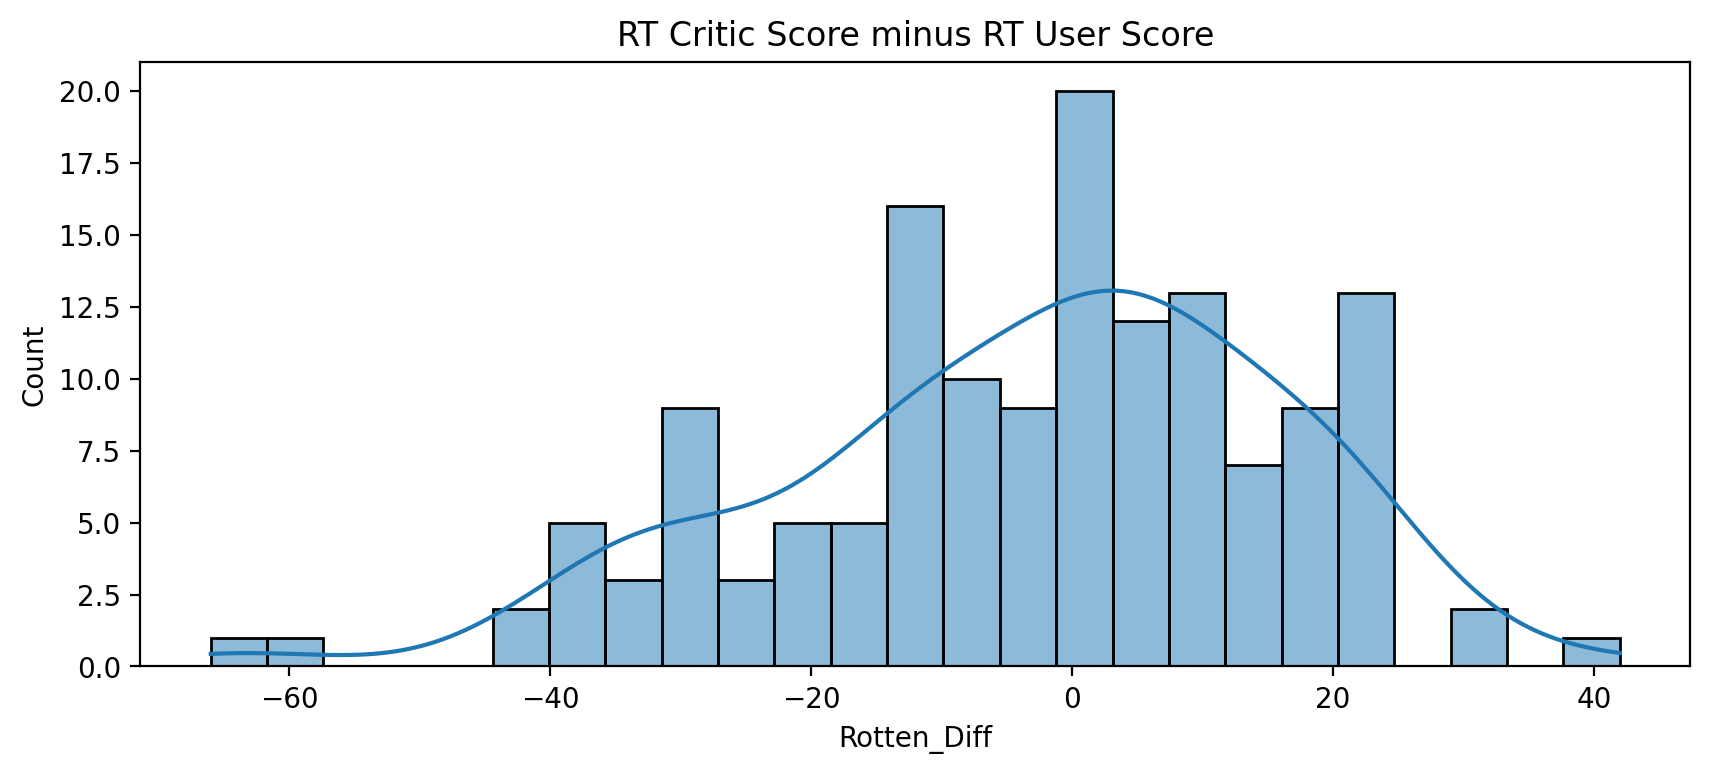

In [32]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=all_sites['Rotten_Diff'],kde=True,bins=25)
plt.title('RT Critic Score minus RT User Score');

Creating a distribution showing the absolute value difference between Critics and Users on Rotten Tomatoes

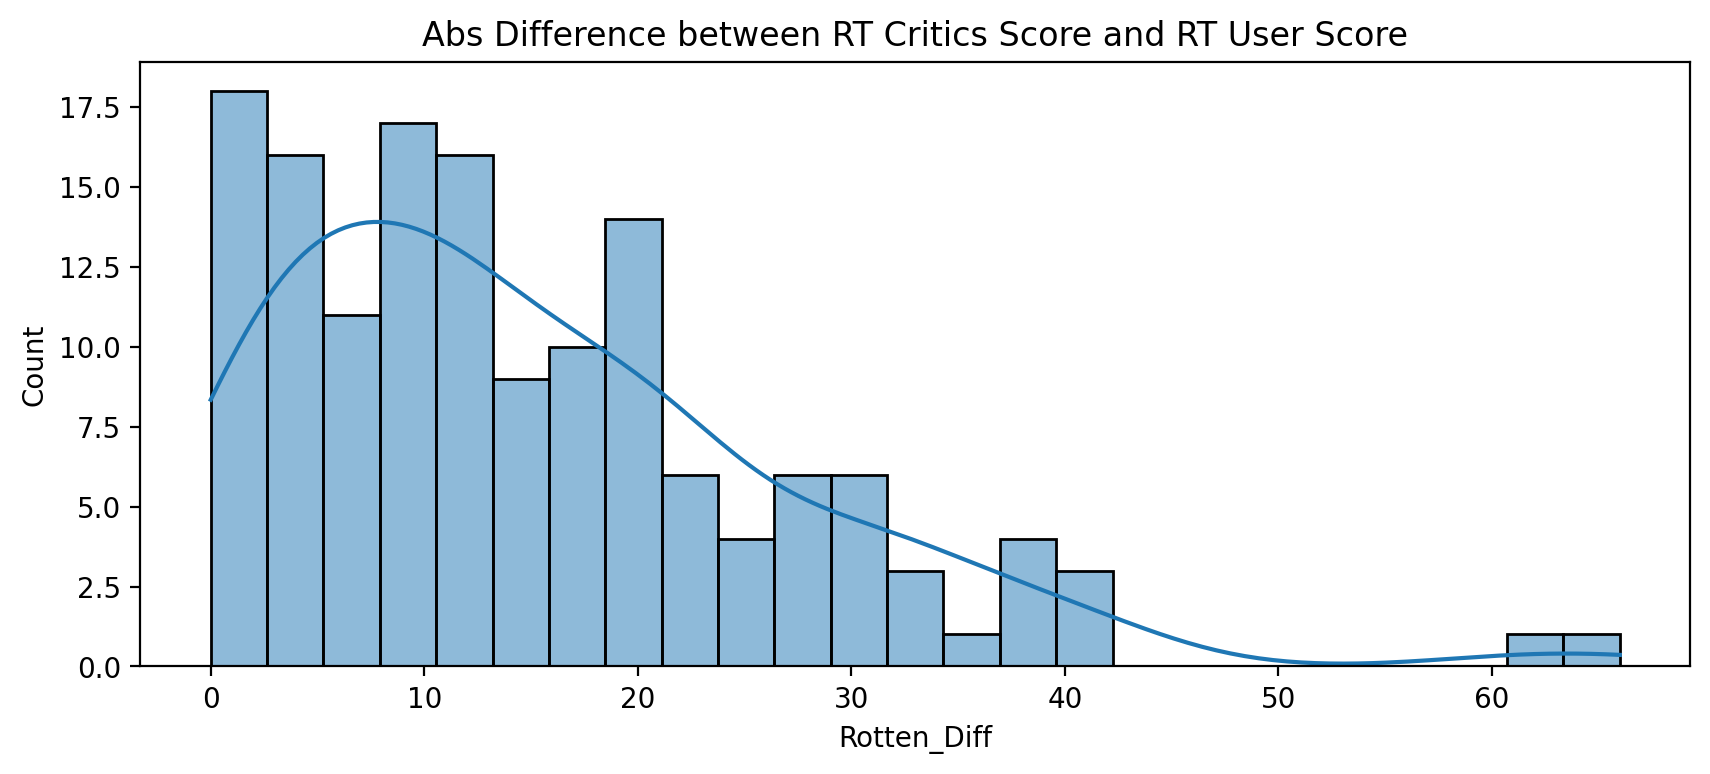

In [33]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=all_sites['Rotten_Diff'].abs(),kde=True,bins=25)
plt.title('Abs Difference between RT Critics Score and RT User Score');

Finding out which movies are causing the largest differences. First, showing the top 5 movies with the largest negative difference between Users and RT critics. Since we calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did.

The top 5 movies users rated higher than critics on average

In [34]:
print('Movies Loved by Users but hated by Critics:')
all_sites.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

Movies Loved by Users but hated by Critics:


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


Top 5 movies critics scores higher than users on average

In [35]:
print('Movies Critics love but Users hate :')
all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

Movies Critics love but Users hate :


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


Ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

Displaying a scatterplot of the Metacritic Rating versus the Metacritic User rating.

In [36]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


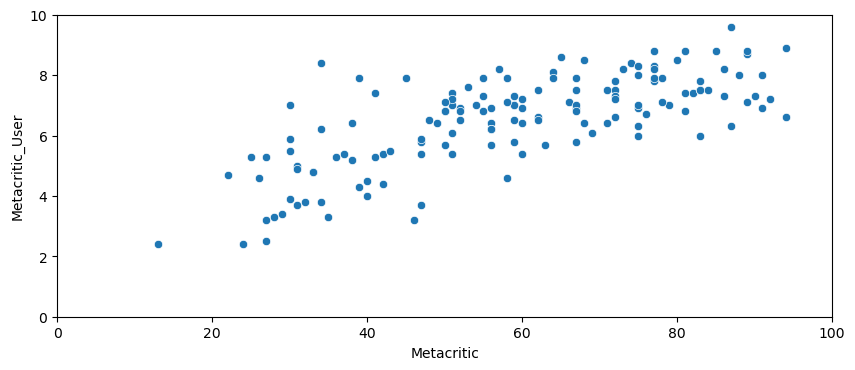

In [37]:
plt.figure(figsize=(10,4),dpi=100)
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10);

Explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Analyzing the most popular movies.

Creating a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.

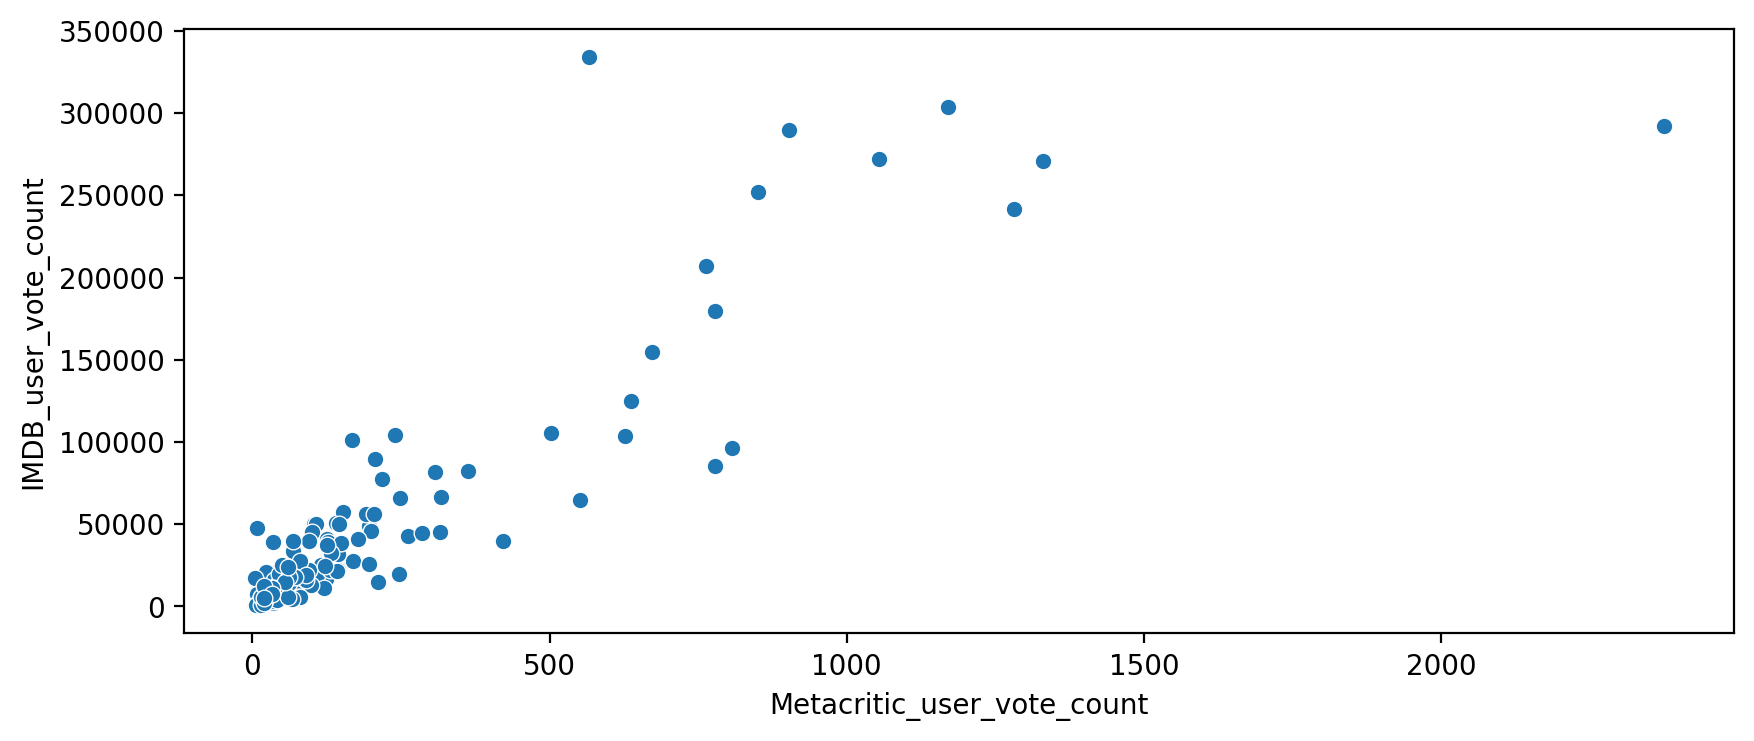

In [38]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count');

Notice there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. What is this movie?

Finding out which movie has the highest IMDB user vote count?

In [39]:
all_sites[all_sites['IMDB_user_vote_count'] == all_sites['IMDB_user_vote_count'].max()]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


The movie that has the highest Metacritic User Vote count

In [40]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


Fandago Scores vs. All Sites

Exploring whether or not Fandango artificially displayed higher ratings than warranted to boost ticket sales.

Combining the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews. We only want to compare movies that are in both DataFrames, so performing an inner merge to merge together both DataFrames based on the FILM columns.

In [41]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [42]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [43]:
df = fandango.merge(all_sites,how='inner',on='FILM')

In [44]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


Normalizing columns to Fandango STARS and RATINGS 0-5 

Creating new normalized columns for all ratings so they match up within the 0-5 star range shown on Fandango. 

In [46]:
df['RT_Norm'] = np.round(df['RottenTomatoes'] / 20 ,1)

In [47]:
df['RTU_Norm'] = np.round(df['RottenTomatoes_User'] / 20 ,1)

In [48]:
df['Meta_Norm'] = np.round(df['Metacritic'] / 20 ,1)

In [49]:
df['Meta_U_Norm'] = np.round(df['Metacritic_User'] / 2 ,1)

In [50]:
df['IMDB_Norm'] = np.round(df['IMDB'] / 2 ,1)

In [51]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


Create a norm_scores DataFrame that only contains the normalizes ratings. Including both STARS and RATING from the original Fandango table.

In [52]:
norm_df = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]
norm_df.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


Comparing Distribution of Scores Across Sites

Creating Seaborn KDE plots comparing the distributions of normalized ratings across all sites.

In [53]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

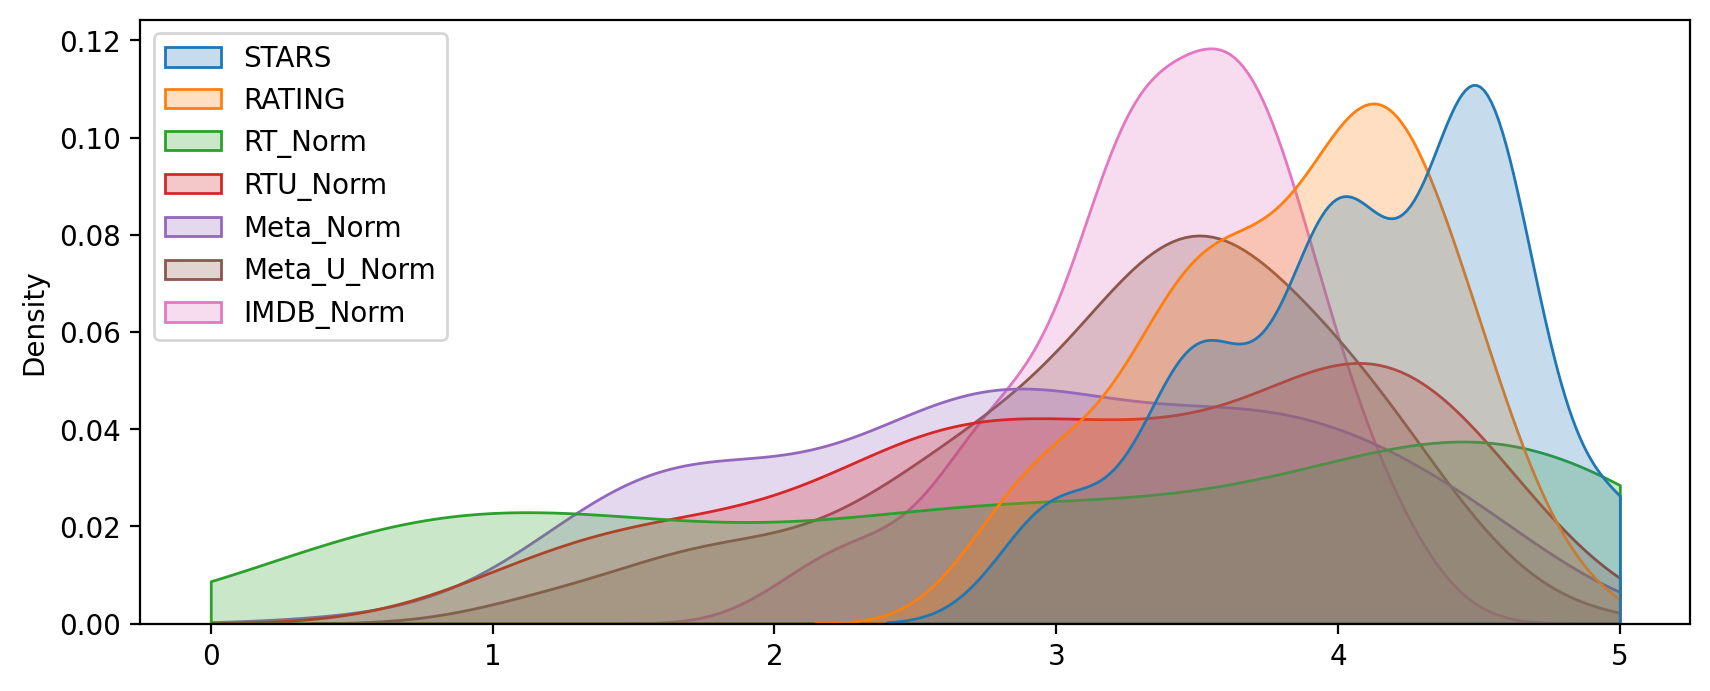

In [54]:
fig,axes = plt.subplots(figsize=(10,4),dpi=200)
sns.kdeplot(data=norm_df,fill=True,clip=[0,5],legend=True)
move_legend(axes, "upper left")
plt.show()

Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.

Creating a KDE plot that compares the distribution of RT critic ratings against the STARS displayed by Fandango.

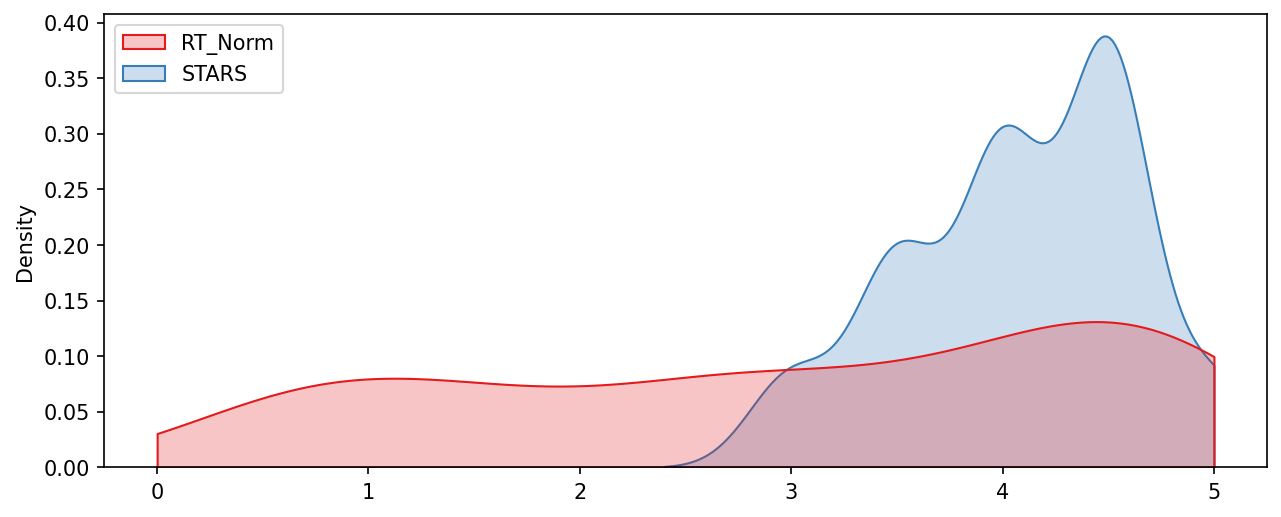

In [55]:
fig, axes = plt.subplots(figsize=(10,4),dpi=150)
sns.kdeplot(data=norm_df[['RT_Norm','STARS']],clip=[0,5],shade=True,palette='Set1')
move_legend(axes, "upper left")
plt.show()

Creating a histplot comparing all normalized scores.

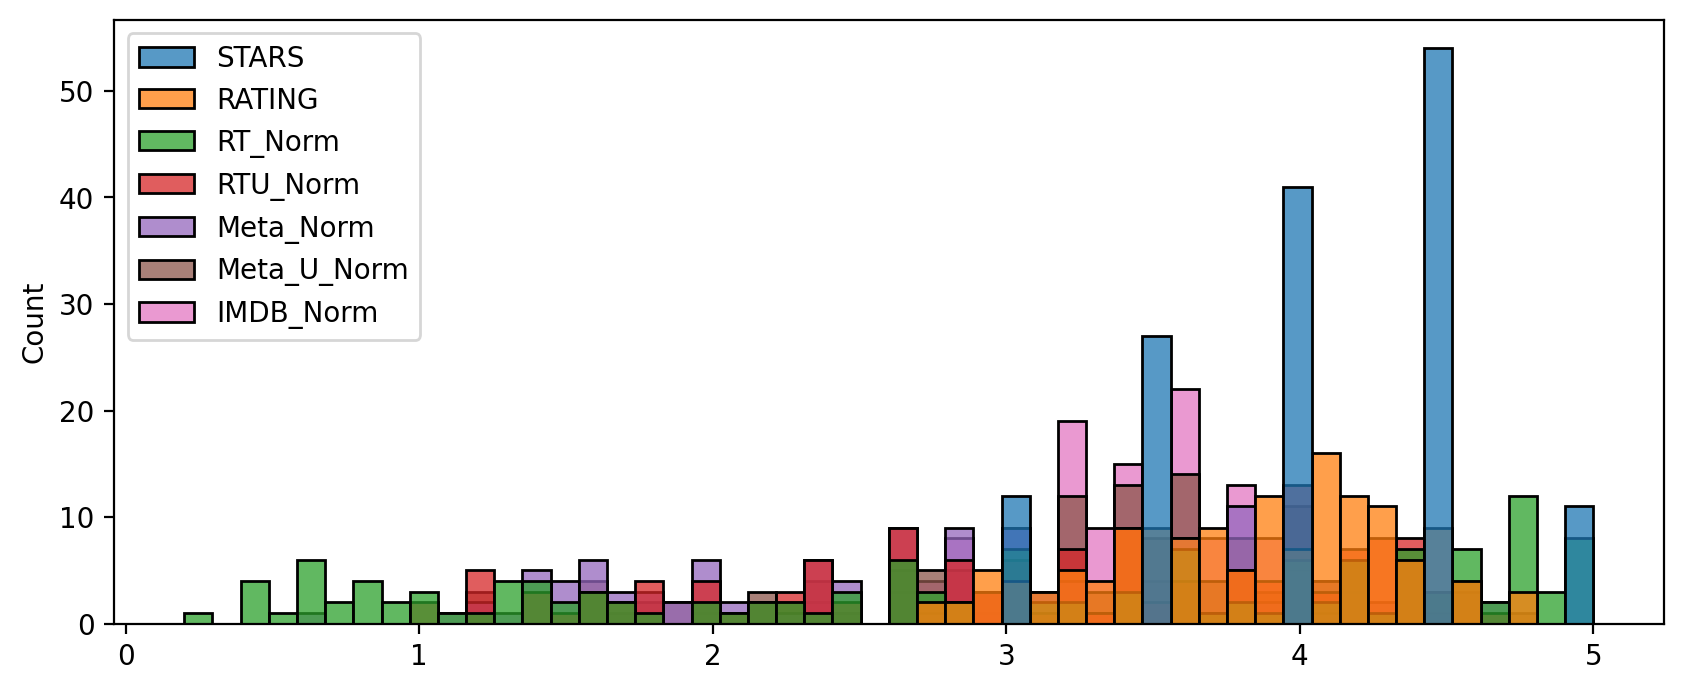

In [56]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=norm_df,bins=50);

Creating a clustermap visualization of all normalized scores. 

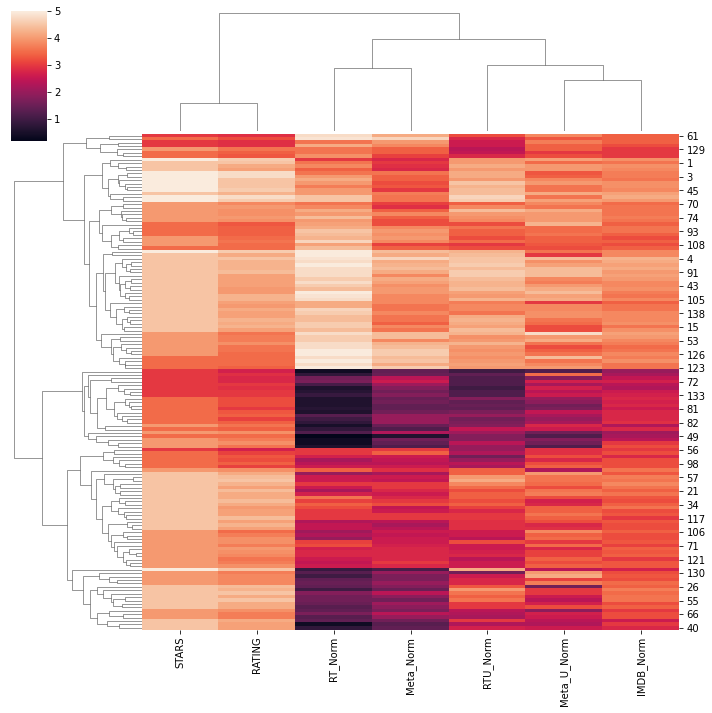

In [57]:
sns.clustermap(norm_df)

Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. 

Based off the Rotten Tomatoes Critic Ratings, finding which are the top 10 lowest rated movies and what are the normalized scores across all platforms for these movies

In [58]:
norm_df

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7


In [59]:
norm_df['FILM'] = df["FILM"]
norm_df.nsmallest(10,'RT_Norm')

<ipython-input-59-dd3d658b76ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_df['FILM'] = df["FILM"]


,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


Visualizing the distribution of ratings across all sites for the top 10 worst movies.

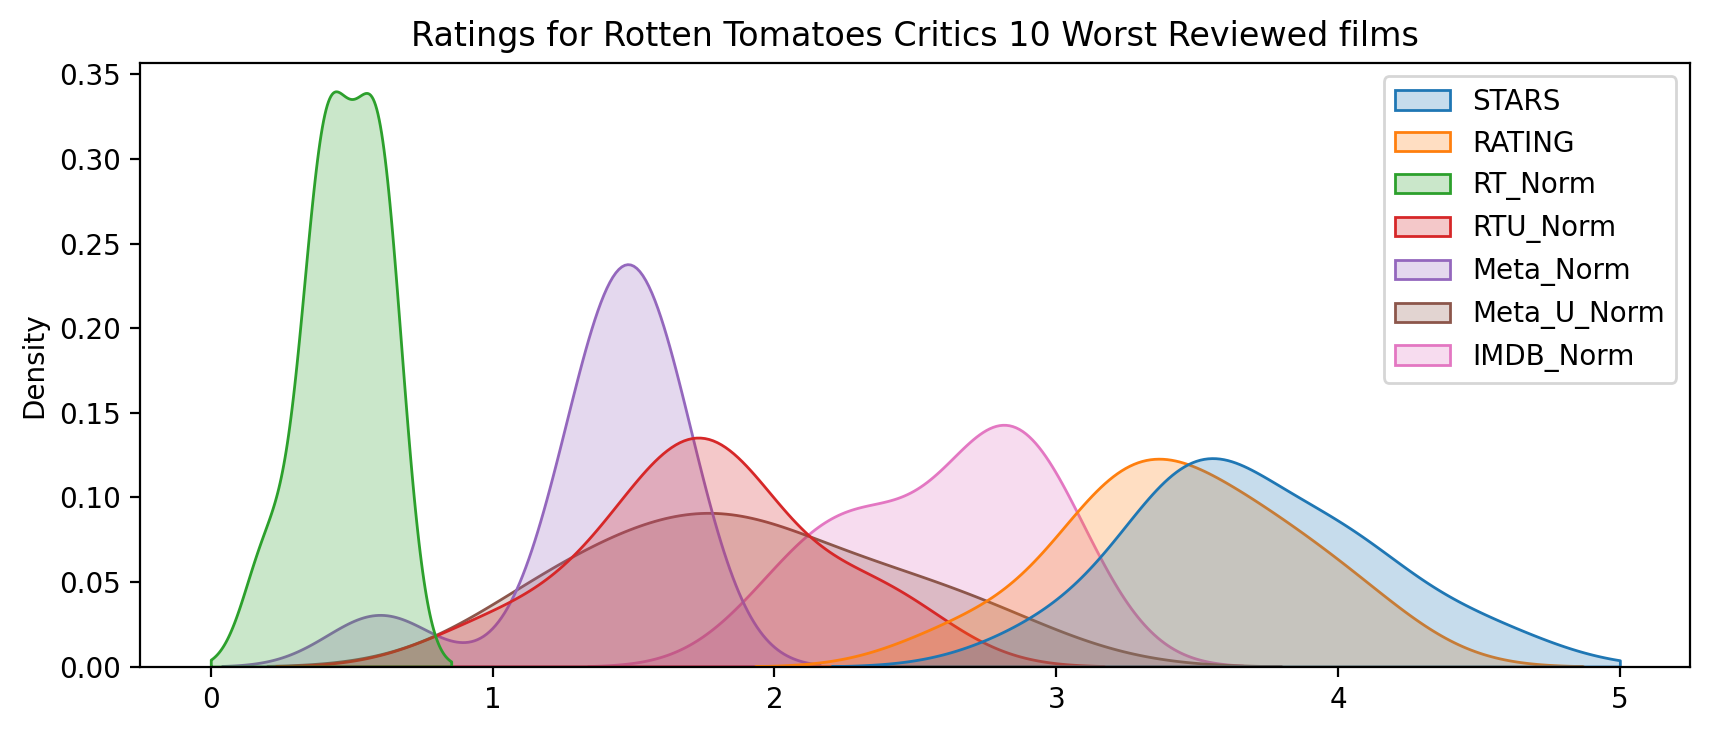

In [60]:
plt.figure(figsize=(10,4),dpi=200)
plt.title('Ratings for Rotten Tomatoes Critics 10 Worst Reviewed films')
sns.kdeplot(data=norm_df.nsmallest(10,'RT_Norm'),fill=True,clip=[0,5]);

Finding the biggest offender of Fandango Ratings which is the film Taken 3. Fandango is displaying 4.5 stars on their website for Taken 3 though it only has an average rating of 1.86

In [61]:
norm_df[norm_df['FILM'] == 'Taken 3 (2015)']

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)


In [62]:
(0.4+2.3+1.3+2.3+3)/5

1.86